# Visualización

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [32]:
#configuración visualización
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'


sns.set_context('poster')
sns.set(rc={'figure.figsize': (12., 6.)})
sns.set_style('whitegrid')


In [3]:
mesur = pd.read_csv('export/mesur_clean.csv')

In [5]:
mesur.corr().style.background_gradient(cmap='coolwarm')

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
distance,1.000000,-0.128967,0.562299,0.075178,0.088175,-0.025738,-0.019791,0.081120
consume,-0.128967,1.000000,-0.227866,-0.160623,-0.320811,0.096591,0.248118,-0.170667
speed,0.562299,-0.227866,1.000000,0.059293,0.015411,-0.035408,0.009489,0.081618
temp_inside,0.075178,-0.160623,0.059293,1.000000,0.359500,0.297376,-0.036937,0.242248
temp_outside,0.088175,-0.320811,0.015411,0.359500,1.000000,0.167562,-0.186315,0.346903
AC,-0.025738,0.096591,-0.035408,0.297376,0.167562,1.000000,0.242915,0.088598
rain,-0.019791,0.248118,0.009489,-0.036937,-0.186315,0.242915,1.000000,-0.112650
sun,0.081120,-0.170667,0.081618,0.242248,0.346903,0.088598,-0.112650,1.000000


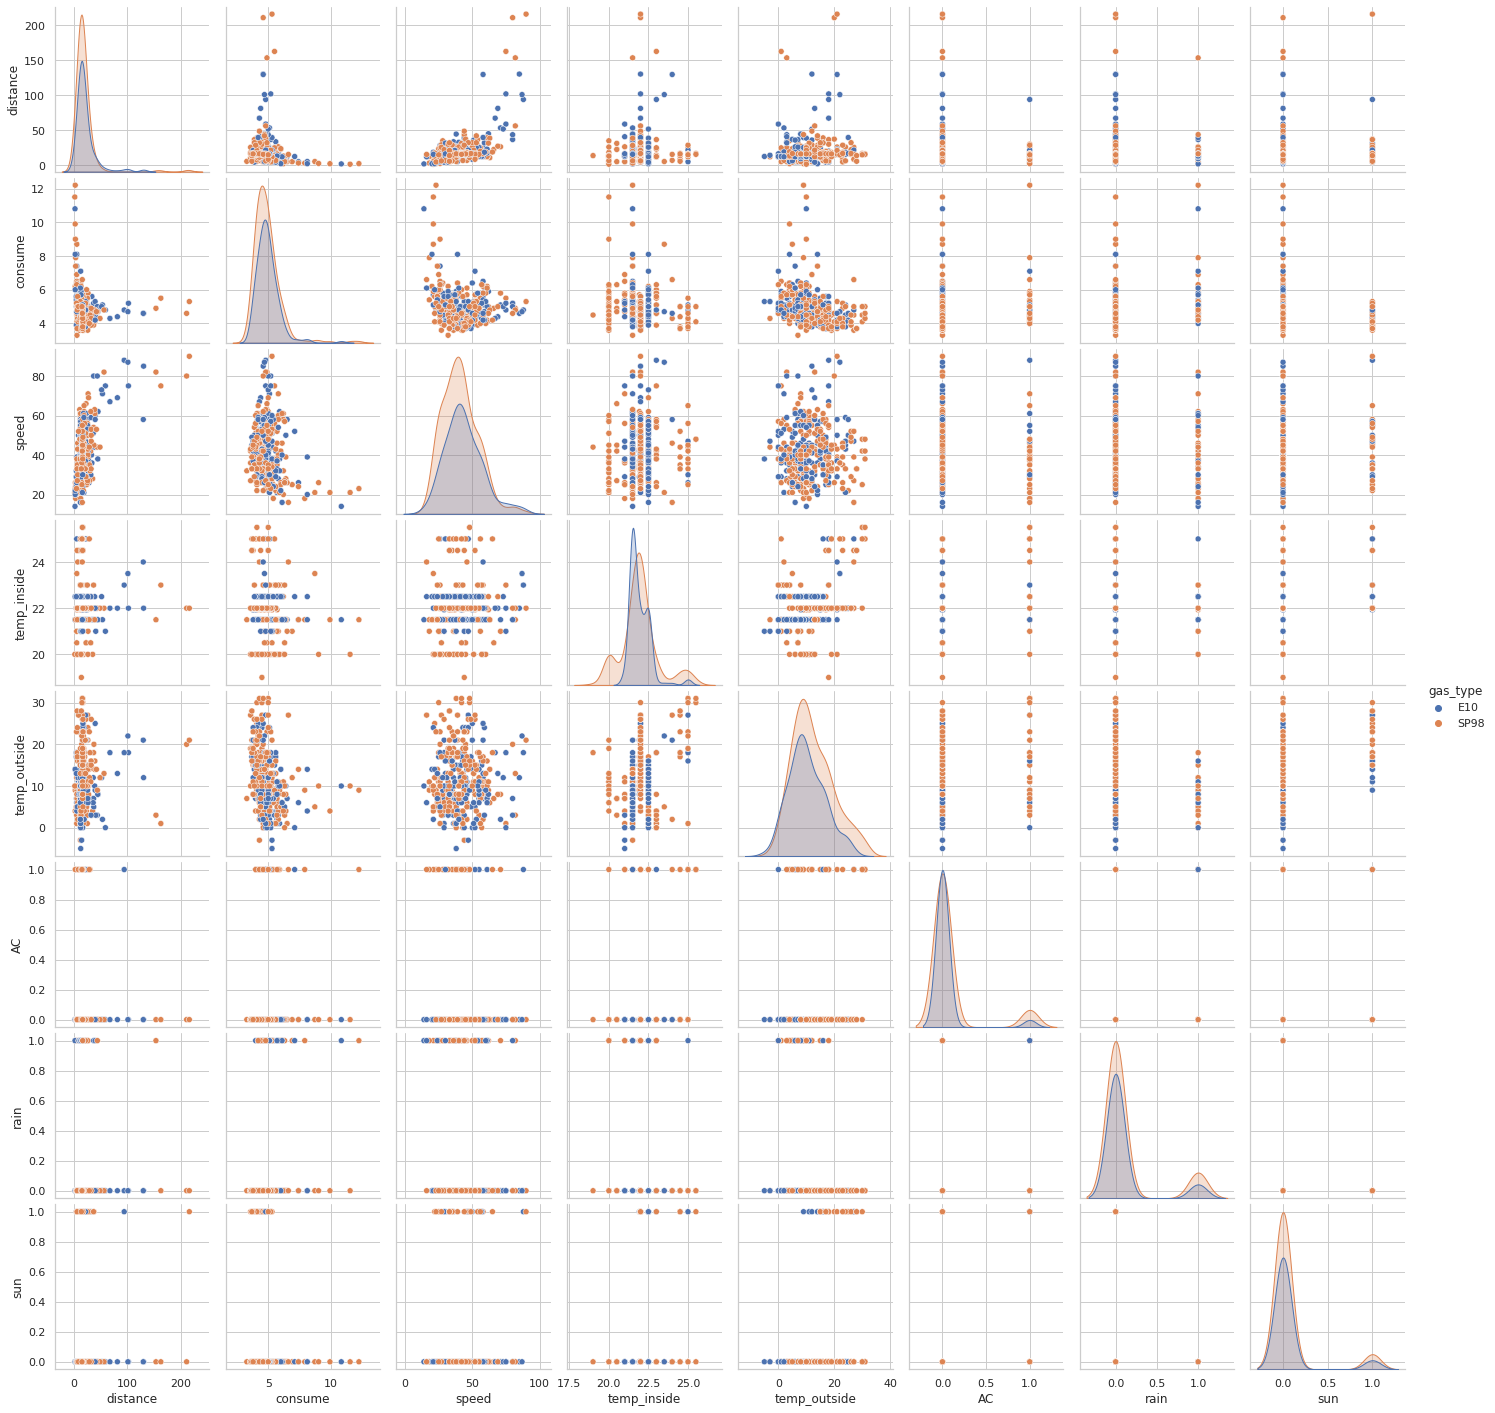

In [8]:
sns.pairplot(mesur, hue="gas_type");

In [13]:
# parece que hay algo de correlación distance/speed - consume/speed, vamos a observarlo más de cerca...

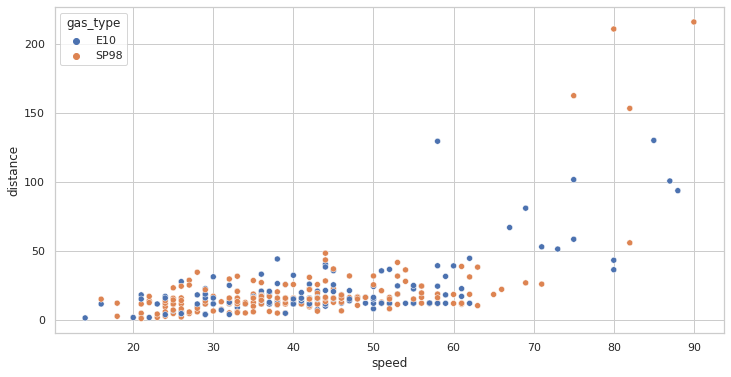

In [11]:
sns.scatterplot(x="speed", y="distance", hue="gas_type",data=mesur);

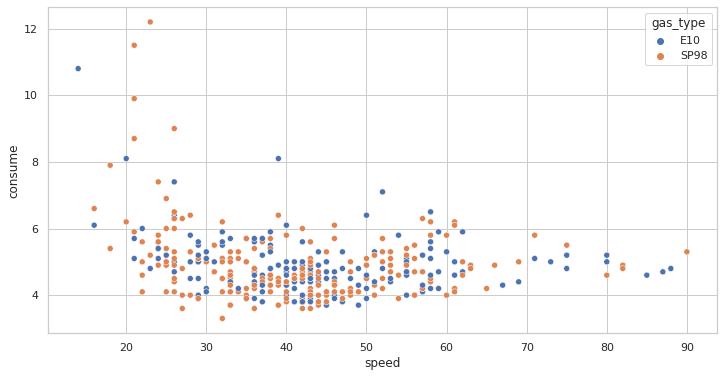

In [12]:
sns.scatterplot(x="speed", y="consume", hue="gas_type",data=mesur);

In [20]:
#observamos más de cerca que no hay prácticamente relación entre ellas.

In [21]:
#pasamos a cuantitatvio la columna categórica de gas_type... E10=1 SP98=0, para obsrevar también la relación del tipo de gasolina con el resto de factores...

In [22]:
mesur.gas_type.value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [34]:
dicc_gas = {'E10':1,'SP98':0}

In [35]:
mesur['gas_num'] = mesur.gas_type.map(dicc_gas)

In [36]:
#comparamos gas_num y consumo

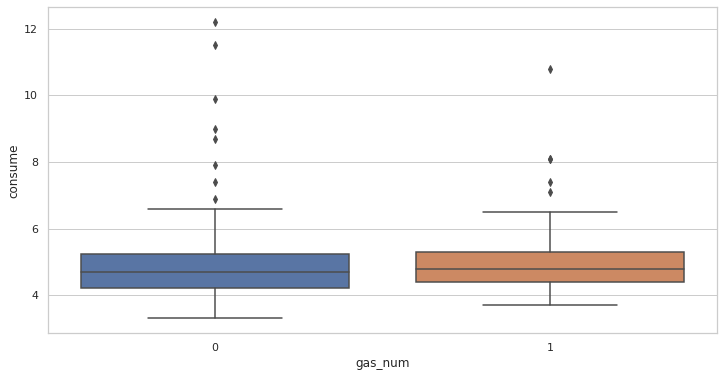

In [37]:
sns.boxplot(x="gas_num", y="consume", data=mesur);

In [38]:
#podemos obesrvar que la media de conumo es prácticamente igual.. y que por lo general los vehículos que usan SP98 consumen menos...

# Regresión

In [44]:
mesur = pd.get_dummies(mesur)
mesur.sample(3)

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_num,gas_type_E10,gas_type_SP98
123,14.2,5.6,24,23.0,8,0,0,0,0,0,1
80,14.2,5.4,36,20.0,6,0,0,0,0,0,1
251,11.8,4.4,42,22.5,8,0,0,0,1,1,0
